In [956]:
from sklearn import svm
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [957]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import umap

In [958]:
# # Load dataset
# df = pd.read_csv("39-features-combined.csv")
# df

In [959]:
# df = df.drop(columns=["file"])

In [960]:
# X = df.iloc[:, 0:39]
# y = df.iloc[:, 39]
# feature_names = list(X.columns)
# target_names = list(y.unique())

In [961]:
# X = df.iloc[:, 0:39]
# y = df.iloc[:, 39]
# feature_names = list(X.columns)
# target_names = list(y.unique())

In [962]:
# X

In [963]:
# # Original class labels
# original_labels = y

# # Mapping to recode the labels
# label_mapping = {'anthrophony': 0, 'biophony': 1, 'geophony': 2, 'other': 3}

# # Recoded labels
# recoded_labels = [label_mapping[label] for label in original_labels]

# # Print the original and recoded labels
# print("Original labels:", original_labels)
# print("Recoded labels:", recoded_labels)

# y = recoded_labels

In [964]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Prepare and scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Create a PCA instance
# pca = PCA(n_components=7)

# # Fit the data to PCA
# pca.fit(X_scaled)

# # Transform the data to the new PCA space
# X = pca.transform(X_scaled)

In [965]:
# from sklearn.manifold import TSNE
# X = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0).fit_transform(X)

In [966]:
# import umap
# X = umap.UMAP(n_components=3, random_state=0, n_neighbors=6,
#         min_dist=0.1).fit_transform(X)

Modified to use two datasets

In [967]:
# Load dataset
df = pd.read_csv("39-features-wambiana.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,file,class
0,0.302366,0.476718,0.878482,0.582860,0.490273,0.832582,0.448314,0.396102,0.693108,0.139327,...,0.220106,0.223402,0.232509,0.232117,0.229781,0.225049,0.227945,0.223224,D:\PhD-data\Wambiana - Processed\anthrophony\a...,anthrophony
1,0.295888,0.500949,0.858542,0.631764,0.619998,0.709132,0.647218,0.423347,0.512613,0.000000,...,0.166014,0.177349,0.189830,0.182647,0.182962,0.179307,0.182542,0.182766,D:\PhD-data\Wambiana - Processed\anthrophony\a...,anthrophony
2,0.330444,0.536335,0.772849,0.639081,0.567348,0.818880,0.474707,0.404804,0.589428,0.171034,...,0.224781,0.225724,0.239201,0.234331,0.221245,0.222835,0.231867,0.248433,D:\PhD-data\Wambiana - Processed\anthrophony\a...,anthrophony
3,0.330896,0.504779,0.897001,0.558110,0.569466,0.848539,0.457330,0.477716,0.662608,0.082363,...,0.170570,0.184858,0.190637,0.177173,0.172919,0.174551,0.181251,0.176279,D:\PhD-data\Wambiana - Processed\anthrophony\a...,anthrophony
4,0.313210,0.515772,0.977697,0.558737,0.664691,0.730027,0.517821,0.349883,0.540746,0.018404,...,0.275726,0.274438,0.282746,0.274603,0.268276,0.278070,0.272201,0.277969,D:\PhD-data\Wambiana - Processed\anthrophony\a...,anthrophony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.301206,0.663619,0.506474,0.483446,0.339153,0.328054,0.592441,0.297489,0.325433,0.573921,...,0.691995,0.703433,0.714558,0.706034,0.704815,0.709495,0.698344,0.712572,D:\PhD-data\Wambiana - Processed\other\audio_s...,other
2233,0.381229,0.726267,0.507784,0.493554,0.343453,0.351584,0.604663,0.317996,0.361661,0.551219,...,0.623818,0.625914,0.627301,0.633213,0.633620,0.643271,0.635574,0.633653,D:\PhD-data\Wambiana - Processed\other\audio_s...,other
2234,0.301759,0.675123,0.532110,0.497538,0.385665,0.322101,0.490745,0.162315,0.240721,0.450908,...,0.764751,0.771767,0.771321,0.761200,0.759762,0.760952,0.762088,0.769853,D:\PhD-data\Wambiana - Processed\other\audio_s...,other
2235,0.352168,0.701405,0.512569,0.525775,0.360312,0.325813,0.500054,0.195244,0.298270,0.532275,...,0.665589,0.659197,0.684322,0.673109,0.677890,0.689264,0.679780,0.676171,D:\PhD-data\Wambiana - Processed\other\audio_s...,other


In [968]:
X = df.iloc[:, 0:13]
y = df['class']

# X = df.iloc[:, 1:14]
# y = df.iloc[:, 0]
feature_names = list(X.columns)
target_names = list(y.unique())

In [969]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_PCA(X):
    # Prepare and scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create a PCA instance
    pca = PCA(n_components=7)

    # Fit the data to PCA
    pca.fit(X_scaled)

    # Transform the data to the new PCA space
    X = pca.transform(X_scaled)

    return X

In [970]:
import umap

def apply_umap(X):
    X = umap.UMAP(n_components=3, random_state=0, n_neighbors=6,
            min_dist=0.1).fit_transform(X)
    return X

In [971]:
from sklearn.manifold import TSNE

def apply_tsne(X):
    X = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1).fit_transform(X)
    return X

In [972]:
X = apply_umap(X)

In [973]:
def load_test_data():
    test_data = pd.read_csv("39-feature-vector.csv")

    y_test = test_data.iloc[:, 0]
    X_test = test_data.iloc[:, 1:40]
    X_test = apply_umap(X_test)
    
    return X_test, y_test

In [974]:
X_test, y_test = load_test_data()
X_test

array([[11.31612  ,  0.799616 , 10.6663885],
       [11.293771 ,  0.8015293, 10.04971  ],
       [11.309027 ,  1.1359484, 10.255122 ],
       ...,
       [ 9.898629 , -3.372333 ,  7.3059464],
       [ 9.852234 , -2.3644755,  5.406022 ],
       [10.172458 , -1.3028865,  4.9842706]], dtype=float32)

below - latest

SVM: Accuracy=0.9598, Precision=0.9539, Recall=0.9328, F1-Score=0.9413


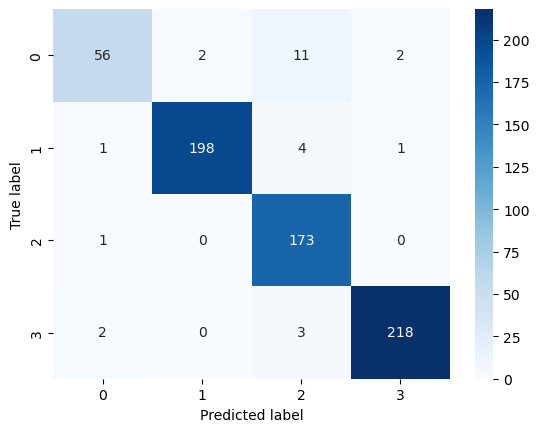

              precision    recall  f1-score   support

 anthrophony       0.93      0.79      0.85        71
    biophony       0.99      0.97      0.98       204
    geophony       0.91      0.99      0.95       174
       other       0.99      0.98      0.98       223

    accuracy                           0.96       672
   macro avg       0.95      0.93      0.94       672
weighted avg       0.96      0.96      0.96       672

DT: Accuracy=0.9643, Precision=0.9550, Recall=0.9467, F1-Score=0.9507


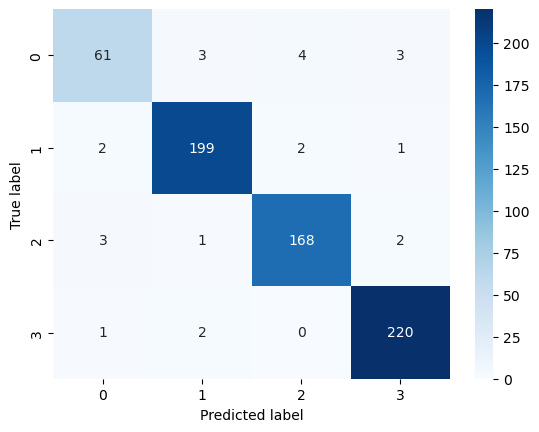

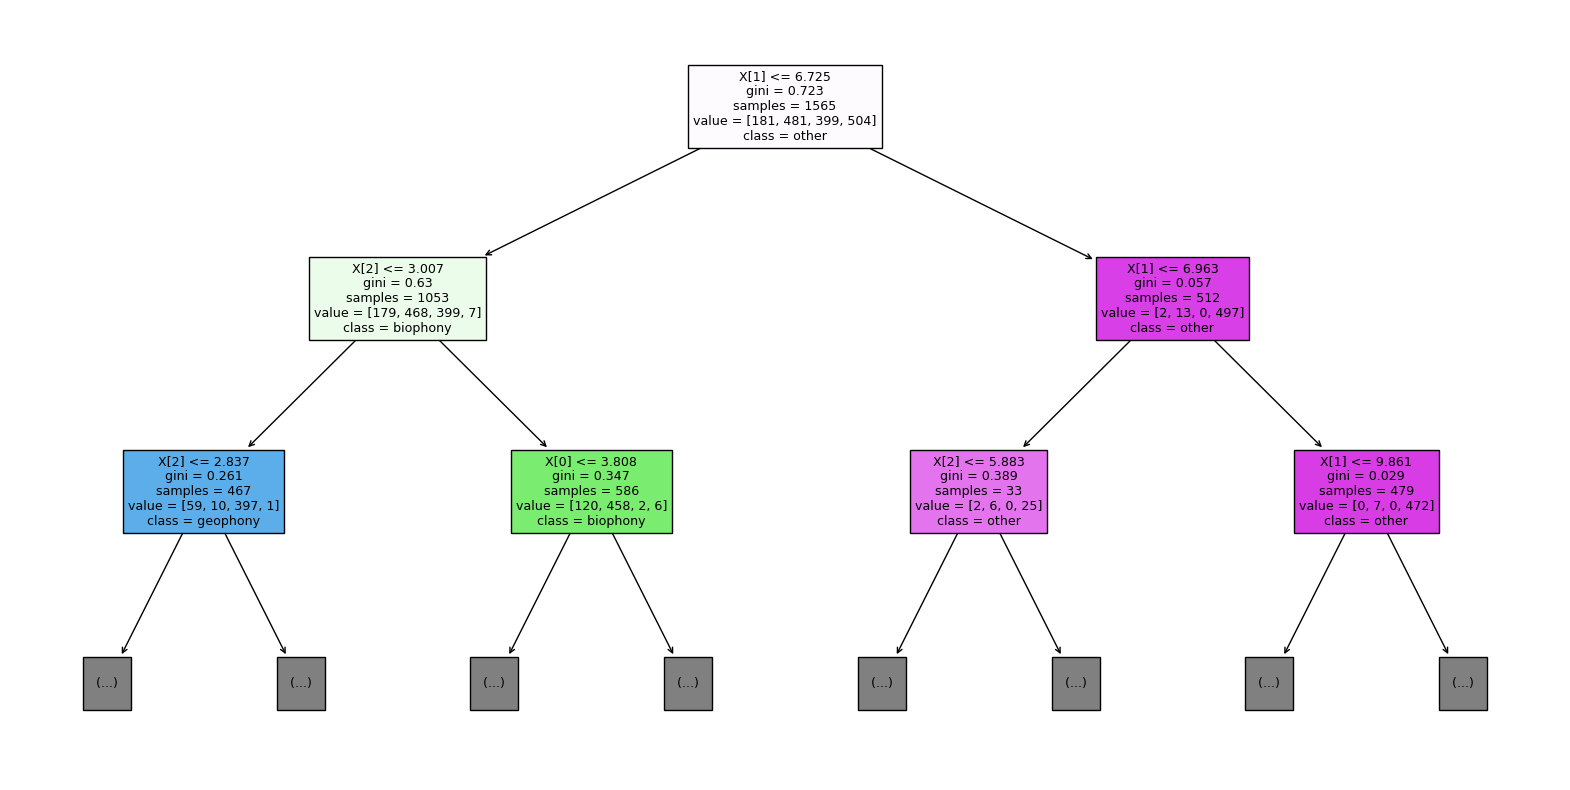

Feature importances: [0.20254058 0.43534594 0.36211348]
              precision    recall  f1-score   support

 anthrophony       0.91      0.86      0.88        71
    biophony       0.97      0.98      0.97       204
    geophony       0.97      0.97      0.97       174
       other       0.97      0.99      0.98       223

    accuracy                           0.96       672
   macro avg       0.96      0.95      0.95       672
weighted avg       0.96      0.96      0.96       672

ANN: Accuracy=0.9420, Precision=0.9451, Recall=0.8902, F1-Score=0.9081


c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


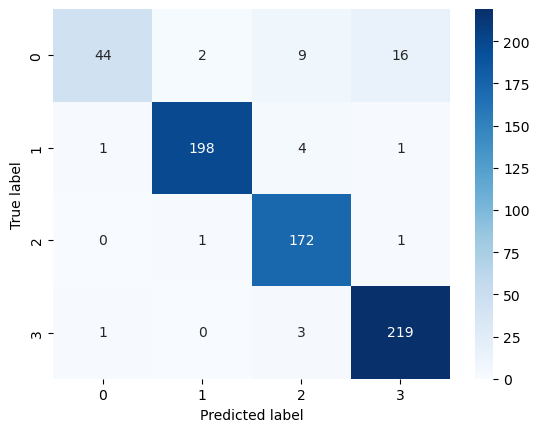

              precision    recall  f1-score   support

 anthrophony       0.96      0.62      0.75        71
    biophony       0.99      0.97      0.98       204
    geophony       0.91      0.99      0.95       174
       other       0.92      0.98      0.95       223

    accuracy                           0.94       672
   macro avg       0.95      0.89      0.91       672
weighted avg       0.94      0.94      0.94       672

kNN: Accuracy=0.9747, Precision=0.9702, Recall=0.9561, F1-Score=0.9623


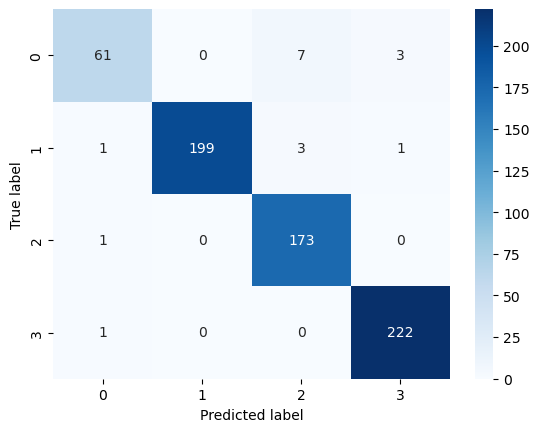

              precision    recall  f1-score   support

 anthrophony       0.95      0.86      0.90        71
    biophony       1.00      0.98      0.99       204
    geophony       0.95      0.99      0.97       174
       other       0.98      1.00      0.99       223

    accuracy                           0.97       672
   macro avg       0.97      0.96      0.96       672
weighted avg       0.98      0.97      0.97       672

Bayes: Accuracy=0.8884, Precision=0.8362, Recall=0.8382, F1-Score=0.8363


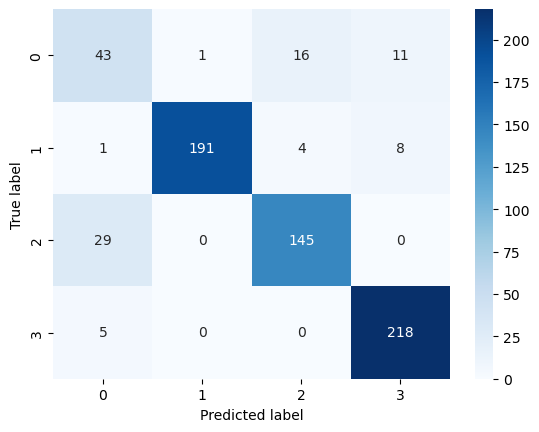

              precision    recall  f1-score   support

 anthrophony       0.55      0.61      0.58        71
    biophony       0.99      0.94      0.96       204
    geophony       0.88      0.83      0.86       174
       other       0.92      0.98      0.95       223

    accuracy                           0.89       672
   macro avg       0.84      0.84      0.84       672
weighted avg       0.89      0.89      0.89       672



In [975]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

classifiers = {
    'SVM': svm.SVC(),
    'DT': tree.DecisionTreeClassifier(),
    'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Bayes': GaussianNB()
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Fit the model on the training data
    
    y_pred = clf.predict(X_test)  # Make predictions on the test data
    
    # Calculate evaluation metrics on the test data
    acc = clf.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    # Generate decision tree diagram and feature importance for DT classifier
    if name == 'DT':
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
        plt.show()
        print(f"Feature importances: {clf.feature_importances_}")

    print(classification_report(y_test, y_pred, target_names=target_names))


In [976]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate, train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_test, y_test = load_test_data()  # Load the second dataset for testing

# for name, clf in classifiers.items():
#     cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)
#     print(cv_results)
#     acc = cv_results['test_accuracy'].mean()
#     precision = cv_results['test_precision_macro'].mean()
#     recall = cv_results['test_recall_macro'].mean()
#     f1 = cv_results['test_f1_macro'].mean()
#     print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     y_pred = cross_val_predict(clf, X_test, y_test, cv=10)
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.show()
#     # Generate decision tree diagram and feature importance for DT classifier
#     if name == 'DT':
#         clf.fit(X_train, y_train)  # Fit the model before accessing feature importances
#         plt.figure(figsize=(20, 10))
#         plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#         plt.show()
#         print(f"Feature importances: {clf.feature_importances_}")

#     print(classification_report(y_test, y_pred, target_names=target_names))


Below - working

In [977]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate, train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# for name, clf in classifiers.items():
#     cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)
#     print(cv_results)
#     acc = cv_results['test_accuracy'].mean()
#     precision = cv_results['test_precision_macro'].mean()
#     recall = cv_results['test_recall_macro'].mean()
#     f1 = cv_results['test_f1_macro'].mean()
#     print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     y_pred = cross_val_predict(clf, X_test, y_test, cv=10)
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.show()
#     # Generate decision tree diagram and feature importance for DT classifier
#     if name == 'DT':
#         clf.fit(X_train, y_train)  # Fit the model before accessing feature importances
#         plt.figure(figsize=(20, 10))
#         plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#         plt.show()
#         print(f"Feature importances: {clf.feature_importances_}")

#     print(classification_report(y_test, y_pred, target_names=target_names))


{'fit_time': array([0.00699949, 0.00649953, 0.00649929, 0.00699997, 0.00600004,
       0.00649905, 0.00700045, 0.00649953, 0.00650001, 0.00564575]), 'score_time': array([0.00450087, 0.00450039, 0.00450015, 0.00399995, 0.00399995,
       0.00400019, 0.00399971, 0.00400043, 0.00399995, 0.00435424]), 'test_accuracy': array([0.99553571, 0.98660714, 0.95982143, 0.97767857, 0.95089286,
       0.96428571, 0.92410714, 0.93721973, 0.96412556, 0.91479821]), 'test_precision_macro': array([0.99662162, 0.98324176, 0.95520264, 0.97983871, 0.92689394,
       0.96053904, 0.92584586, 0.94907072, 0.97037671, 0.92014406]), 'test_recall_macro': array([0.99632353, 0.98161269, 0.91561404, 0.97550725, 0.96193171,
       0.93295215, 0.86188406, 0.87833671, 0.92568966, 0.86058824]), 'test_f1_macro': array([0.99644747, 0.98229714, 0.92964341, 0.97693107, 0.93900716,
       0.94381619, 0.87664406, 0.89669744, 0.9419625 , 0.87573138])}
SVM: Accuracy=0.9575, Precision=0.9568, Recall=0.9290, F1-Score=0.9359


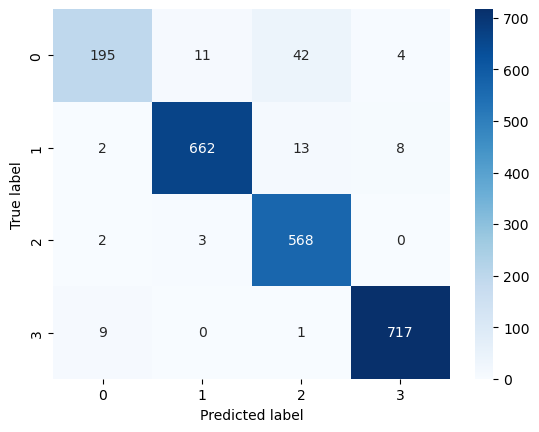

              precision    recall  f1-score   support

 anthrophony       0.94      0.77      0.85       252
    biophony       0.98      0.97      0.97       685
    geophony       0.91      0.99      0.95       573
       other       0.98      0.99      0.98       727

    accuracy                           0.96      2237
   macro avg       0.95      0.93      0.94      2237
weighted avg       0.96      0.96      0.96      2237

{'fit_time': array([0.00199986, 0.00200057, 0.00199986, 0.00200033, 0.00200009,
       0.00199986, 0.00200009, 0.00199986, 0.00200009, 0.00200009]), 'score_time': array([0.00149965, 0.00149918, 0.00149989, 0.00149989, 0.00149989,
       0.00150013, 0.00150013, 0.00150013, 0.00150013, 0.00199938]), 'test_accuracy': array([0.97321429, 0.97767857, 0.97321429, 0.99107143, 0.94642857,
       0.96875   , 0.90625   , 0.94618834, 0.97757848, 0.91928251]), 'test_precision_macro': array([0.97361745, 0.97649573, 0.96944777, 0.99211823, 0.92061404,
       0.95783153, 0.8

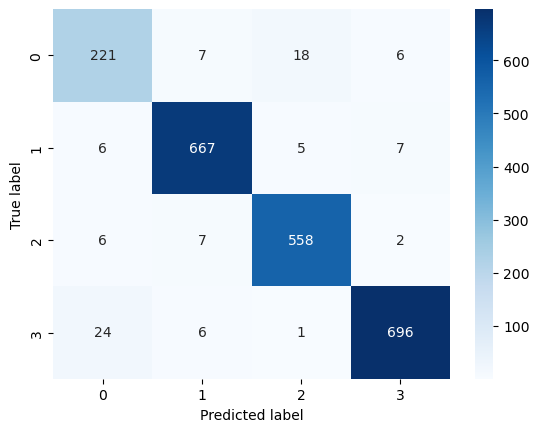

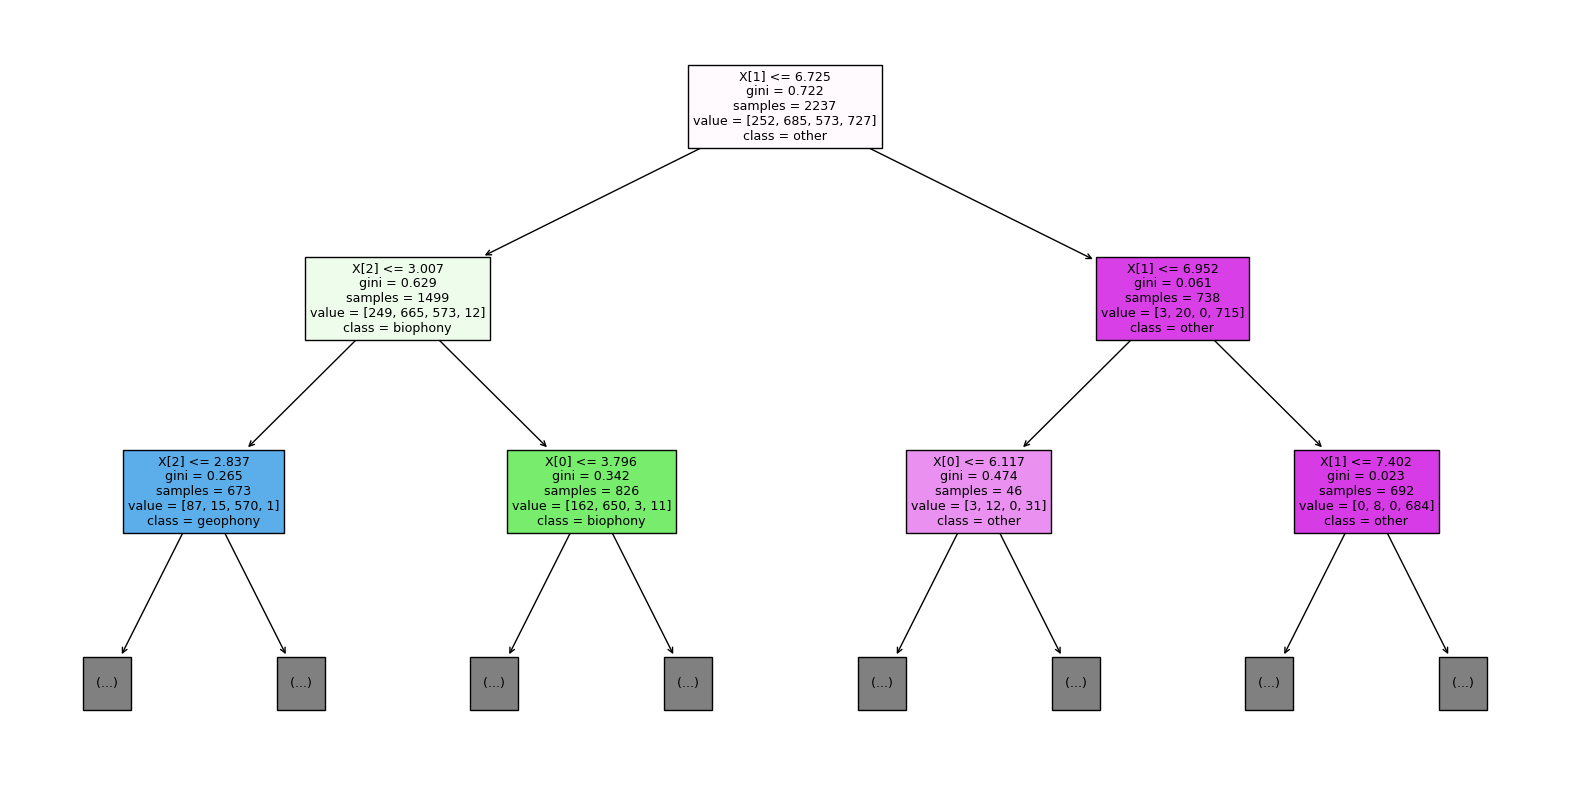

Feature importances: [0.18935639 0.45638397 0.35425964]
              precision    recall  f1-score   support

 anthrophony       0.86      0.88      0.87       252
    biophony       0.97      0.97      0.97       685
    geophony       0.96      0.97      0.97       573
       other       0.98      0.96      0.97       727

    accuracy                           0.96      2237
   macro avg       0.94      0.95      0.94      2237
weighted avg       0.96      0.96      0.96      2237

{'fit_time': array([0.00149918, 0.00149965, 0.00149965, 0.00099969, 0.00150061,
       0.00099969, 0.00149941, 0.00149941, 0.00099993, 0.00150013]), 'score_time': array([0.00350022, 0.00350022, 0.00300121, 0.0035007 , 0.00349927,
       0.0035007 , 0.00350046, 0.00350022, 0.00350022, 0.00349951]), 'test_accuracy': array([0.98660714, 0.98660714, 0.99553571, 0.97767857, 0.95535714,
       0.99107143, 0.97767857, 0.94618834, 0.98206278, 0.91928251]), 'test_precision_macro': array([0.98368589, 0.97851967, 0.

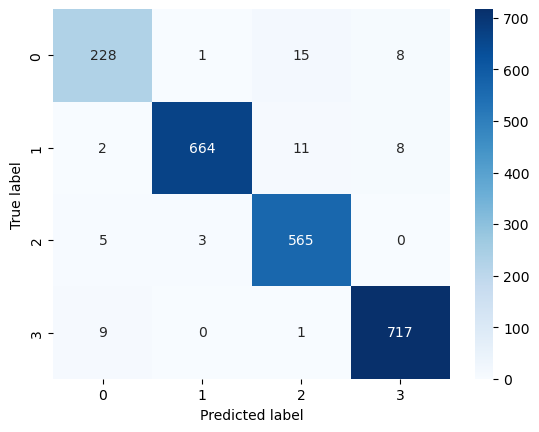

              precision    recall  f1-score   support

 anthrophony       0.93      0.90      0.92       252
    biophony       0.99      0.97      0.98       685
    geophony       0.95      0.99      0.97       573
       other       0.98      0.99      0.98       727

    accuracy                           0.97      2237
   macro avg       0.97      0.96      0.96      2237
weighted avg       0.97      0.97      0.97      2237

{'fit_time': array([0.00100064, 0.00139832, 0.00049996, 0.00099993, 0.00049996,
       0.00049949, 0.00049996, 0.00100017, 0.00100088, 0.00099993]), 'score_time': array([0.00149918, 0.00110149, 0.00149989, 0.00150061, 0.00150037,
       0.00149965, 0.00149989, 0.00149989, 0.00149918, 0.00149989]), 'test_accuracy': array([0.96428571, 0.87053571, 0.86607143, 0.95982143, 0.90178571,
       0.90625   , 0.84821429, 0.85650224, 0.83408072, 0.77578475]), 'test_precision_macro': array([0.94359132, 0.85479263, 0.81373626, 0.96590909, 0.87673933,
       0.85808279, 0.8

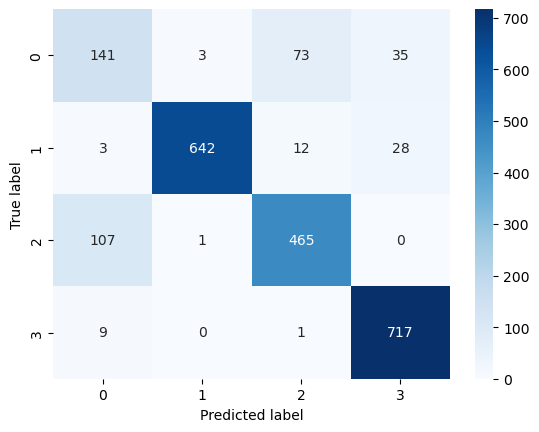

              precision    recall  f1-score   support

 anthrophony       0.54      0.56      0.55       252
    biophony       0.99      0.94      0.96       685
    geophony       0.84      0.81      0.83       573
       other       0.92      0.99      0.95       727

    accuracy                           0.88      2237
   macro avg       0.82      0.82      0.82      2237
weighted avg       0.88      0.88      0.88      2237



In [978]:
from sklearn import svm, tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = {
    'SVM': svm.SVC(),
    'DT': tree.DecisionTreeClassifier(),
    #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Bayes': GaussianNB()
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for name, clf in classifiers.items():
    cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
    print(cv_results)
    acc = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    f1 = cv_results['test_f1_macro'].mean()
    print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

    y_pred = cross_val_predict(clf, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    # Generate decision tree diagram and feature importance for DT classifier
    if name == 'DT':
        clf.fit(X, y)  # Fit the model before accessing feature importances
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
        plt.show()
        print(f"Feature importances: {clf.feature_importances_}")
    
    print(classification_report(y, y_pred, target_names=target_names))

https://umap-learn.readthedocs.io/en/latest/supervised.html#using-labels-to-separate-classes-supervised-umap

In [979]:
embedding = umap.UMAP().fit_transform(X_train, y=y_train)

ValueError: could not convert string to float: 'other'

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

Precision: 0.6950777380200851
Recall: 0.7154381137462863
F1 score: 0.6960164553892401
Accuracy: 0.7013857845328565


Text(0.5, 1.0, 'Tarcutta Embedded via UMAP using Labels')

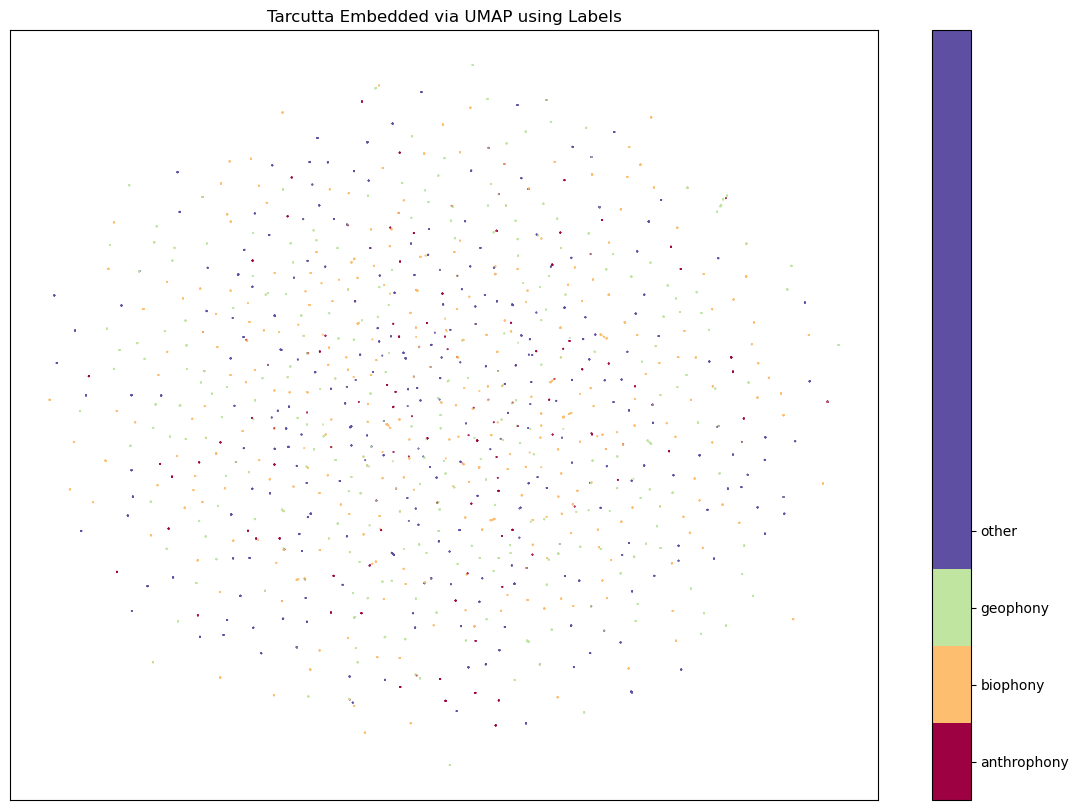

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=y_train, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(target_names)
plt.title('Tarcutta Embedded via UMAP using Labels')

Semi-supervised learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("39-features-tarcutta.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '39-features-tarcutta.csv'

In [ ]:
X = df.iloc[:, 0:39]
y = df.iloc[:, 39]
feature_names = list(X.columns)
target_names = list(y.unique())

In [ ]:
# Original class labels
original_labels = y

# Mapping to recode the labels
label_mapping = {'anthrophony': 0, 'biophony': 1, 'geophony': 2, 'other': 3}

# Recoded labels
recoded_labels = [label_mapping[label] for label in original_labels]

# Print the original and recoded labels
print("Original labels:", original_labels)
print("Recoded labels:", recoded_labels)

y = recoded_labels

Original labels: 0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
8836          other
8837          other
8838          other
8839          other
8840          other
Name: class, Length: 8841, dtype: object
Recoded labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

C:\Users\Thomas\AppData\Local\Temp\ipykernel_31328\3908154788.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Replace with the desired colormap


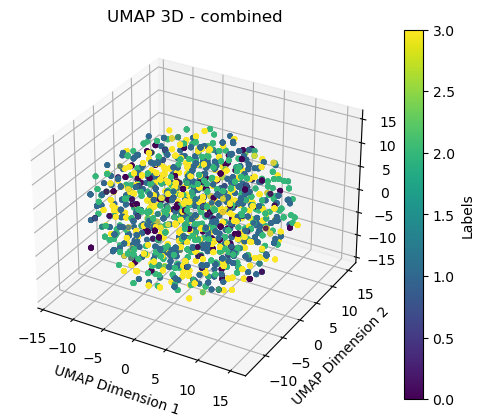

In [ ]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data stored in a variable called "data"
# Make sure your data is in the shape of (n_samples, n_features)
# Assuming you have a column of labels stored in a variable called "labels"

# Initialize UMAP with desired parameters
reducer = umap.UMAP(n_components=3, random_state=0, n_neighbors=6, min_dist=0.1)

# Perform dimension reduction
X = reducer.fit_transform(X)

cmap = plt.cm.get_cmap('viridis')  # Replace with the desired colormap

# Plot the reduced dimensions in a 3D scatterplot with colormap
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, s=10)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('UMAP 3D - combined')

# Add a colorbar to the plot
cbar = fig.colorbar(sc)
cbar.set_label('Labels')

plt.show()


In [ ]:
X = (X - X.min()) / (X.max() - X.min())
X

array([[0.5445447 , 0.15434837, 0.13262406],
       [0.18734385, 0.5101783 , 0.5531743 ],
       [0.48112464, 0.34477472, 0.7682963 ],
       ...,
       [0.6565027 , 0.31297365, 0.48023638],
       [0.5806706 , 0.16490805, 0.40525317],
       [0.4037463 , 0.31138366, 0.32959333]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Define unlabelled data

In [ ]:
X_train, X_unl, y_train, y_unl = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

In [ ]:
from sklearn.svm import SVC
clf = SVC().fit(X_train, y_train)
clf.score(X_test, y_test)

0.4530719939690916

In [ ]:
# import numpy as np
# from scipy.spatial.distance import cdist

# def compute_cohesion(X, labels):
#     unique_labels = np.unique(labels)
#     cohesion = 0.0
#     for label in unique_labels:
#         cluster_points = X[labels == label]
#         pairwise_distances = cdist(cluster_points, cluster_points, metric='euclidean')
#         avg_pairwise_distance = np.mean(pairwise_distances)
#         cohesion += avg_pairwise_distance
#     cohesion /= len(unique_labels)
#     return cohesion

# def compute_separation(X, labels):
#     unique_labels = np.unique(labels)
#     separation = 0.0
#     for i in range(len(unique_labels)):
#         for j in range(i+1, len(unique_labels)):
#             cluster_points_1 = X[labels == unique_labels[i]]
#             cluster_points_2 = X[labels == unique_labels[j]]
#             pairwise_distances = cdist(cluster_points_1, cluster_points_2, metric='euclidean')
#             avg_pairwise_distance = np.mean(pairwise_distances)
#             separation += avg_pairwise_distance
#     total_pairs = len(unique_labels) * (len(unique_labels) - 1) / 2  # Number of unique cluster pairs
#     separation /= total_pairs
#     return separation

In [ ]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# from sklearn.cluster import KMeans

# # Step 1: Split labeled dataset
# X_labeled_train, X_labeled_eval, y_labeled_train, y_labeled_eval = train_test_split(X, y, test_size=0.3)

# # Step 2: Train a supervised learning model
# model = svm.SVC()
# model.fit(X_labeled_train, y_labeled_train)

# # Step 3: Apply the model to unlabeled data
# unlabeled_predictions = model.predict(X_unlabeled)

# # Step 4: Calculate internal validity metrics
# kmeans = KMeans(n_clusters=n_clusters)
# cluster_labels = kmeans.fit_predict(X_unlabeled)
# cohesion = compute_cohesion(X_unlabeled, cluster_labels)  # Implement your own cohesion calculation
# separation = compute_separation(X_unlabeled, cluster_labels)  # Implement your own separation calculation

# # Step 5: Evaluate model's performance on labeled data
# y_pred_eval = model.predict(X_labeled_eval)
# accuracy = accuracy_score(y_labeled_eval, y_pred_eval)

# # Print results
# print("Accuracy on labeled evaluation set:", accuracy)
# print("Cohesion:", cohesion)
# print("Separation:", separation)